In [3]:
import sys
sys.path.append('/Users/ChrisV/Documents/Galvanize/final-project/data_clean')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import model_data_prep as mdp
%matplotlib inline

In [5]:
df = pd.read_csv('../data/0408final.csv')
df.index = df['Unnamed: 0']

In [ ]:
for route in df.index:
    if df.loc[route]['UniqueCarrier'] == 'HP':
        if pd.to_datetime(df.loc[route]['2005LastDate']) > pd.to_datetime('2005-12-25'):
            df.set_value(route,'2005ClosureIndicator', 0)
    if pd.to_datetime(df.loc[route]['2008LastDate']) > pd.to_datetime('2008-09-01'):
        df.set_value(route,'2008ClosureIndicator',0)

In [ ]:
# CREATE HIST
year_list = range(2004,2009)
route_dict = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}LastDate'.format(year)]):
            if 3 > len(route_dict[route]) > 0:
                route_dict[route].append( 
                    df.loc[route]['{}FirstDate'.format(year + 1)])
            continue
        elif len(route_dict[route]) > 0:
            continue
        else:
            route_dict[route].extend([df.loc[route]['{}ClosureIndicator'.format(
                year)], df.loc[route]['{}LastDate'.format(year)]])
    if len(route_dict[route]) < 3:
        route_dict[route].append(df.loc[route]['2004FirstDate'])
    
route_dict.values()[12]

In [ ]:
# CREATE HIST
X_list = []
y_list = []
route_list = []
for route in route_dict.keys(): 
    if route_dict[route][0] == 1:
        day = abs(pd.to_datetime(route_dict[route][1])-pd.to_datetime(route_dict[route][2])).days
        X_list.append(day)
        if day > 1700:
            route_list.append(route)

In [ ]:
# CREATE HIST
plt.hist(X_list,bins=15)
plt.show()

In [7]:
#CREATE VIOLIN PLOT
year_list = range(2004,2009)
route_dict2 = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}fill_pct'.format(year)]):
            continue
        else:
            route_dict2[route].append([df.loc[route]['{}ClosureIndicator'.format(year)],\
                                     df.loc[route]['{}fill_pct'.format(year)],route])
            break
        

In [26]:
#CREATE VIOLIN PLOT
close_list = []
open_list = []
y_pos = [0,1]
for value in route_dict2.values():
    if value[0][0] == 0:
        open_list.append(value[0][1])
        #open_route.append(value[0][2])
    if value[0][0] == 1:
        close_list.append(value[0][1])
        #closed_route.append(value[0][2])

#plt.violinplot([np.asarray(open_list),np.asarray(close_list)],y_pos)
ax = sns.violinplot(x='YEAH',y='YEAH',data=[np.asarray(open_list),np.asarray(close_list)])
ax.set(xlabel='common xlabel', ylabel='common ylabel')

plt.show()

AttributeError: 'list' object has no attribute 'get'

In [ ]:
year_list = range(2004,2009)
route_dict3 = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}fill_pct'.format(year)]):
            continue
        else:
            if df.loc[route]['{}FlightTotal'.format(year)] < 1000:
                continue
            else:
                route_dict3[route].append([df.loc[route]['{}ClosureIndicator'.format(year)],\
                                     df.loc[route]['{}AvgDelay'.format(year)],route])
            break


In [152]:
close_list2 = []
open_list2 = []
open_route = []
closed_route = []
for value in route_dict3.values():
    if value[0][0] == 0:
        open_list2.append(value[0][1])
        open_route.append(value[0][2])
    if value[0][0] == 1:
        close_list2.append(value[0][1])
        closed_route.append(value[0][2])

def argsort(seq):
    # http://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python
    return sorted(range(len(seq)), key=seq.__getitem__)

top = argsort(open_list2)[::-1][0:10]
for index in top:
    print open_list2[index]
    print open_route[index]

33.2888959123
OO EWR MKE
32.724880964
AA JFK MIA
31.8064182195
AA MCO SJU
29.698685541
B6 EWR PBI
27.7826777218
UA DEN EWR
27.6042736799
UA EWR ORD
26.8684594538
CO EWR ORD
26.3917819365
CO EWR RDU
26.2068354085
OO CEC SFO
25.5817356206
CO CMH EWR


In [155]:
df = df.dropna()

In [156]:
sum_groupby = df.groupby('UniqueCarrier').sum()

In [157]:
sum_groupby

,2004Seats,2004Passengers,2004fill_pct,2004FlightTotal,2004CRSElapsedTime,2004ActualElapsedTime,2004ClosureIndicator,2004AvgDelay,2004CarrierDelay,2004WeatherDelay,...,2008ClosureIndicator,2008AvgDelay,2008CarrierDelay,2008WeatherDelay,2008NASDelay,2008CancelledAvg,2008LateAircraftAvg,2008Distance,2008BlockTime,Seasonal
UniqueCarrier,,,,,,,,,,,,,,,,,,,,,
AA,90764515.0,67648202.0,144.809932,637549.0,37677.643013,37433.596001,1.0,1660.180780,653.559183,217.386413,...,5.0,2748.433826,3821.719599,547.073775,3514.496497,4.740374,4198.420506,250167.902587,83.312774,0
AS,19283863.0,13724396.0,44.832565,150588.0,9194.927660,9043.714880,0.0,527.614932,237.384846,18.063386,...,6.0,482.983255,993.728498,116.485170,711.917497,1.082045,1526.298868,58496.414974,110.065051,0
B6,13950612.0,11617452.0,31.068040,89112.0,8545.722944,8318.972922,0.0,109.270870,61.530521,11.045401,...,0.0,382.862392,490.798253,44.239209,881.893794,0.564447,925.222774,57963.000000,72.879755,0
CO,41229382.0,31117712.0,97.174826,290391.0,24817.250883,24919.324157,5.0,791.585665,268.226320,70.587216,...,11.0,1595.264988,1896.819107,380.067969,3162.305474,1.539987,2373.680216,160025.115285,289.985191,2
DL,92276768.0,68411141.0,122.180206,564028.0,28652.767859,28691.595790,0.0,1273.588757,473.145276,54.165330,...,10.0,1276.752775,2500.788881,301.009375,3005.543270,2.085648,2954.778674,184618.954591,78.293519,0
EV,9667386.0,6631490.0,68.918142,172927.0,9491.901597,9078.925525,2.0,1119.909002,402.801636,283.206186,...,8.0,1089.828779,2495.336050,787.075416,1588.917859,1.767612,902.032259,43999.762508,205.995152,2
HA,6778436.0,5429464.0,13.617119,46626.0,3855.102327,3795.452159,0.0,39.313698,85.474765,1.199275,...,1.0,95.146072,645.443718,22.288378,3.033844,0.065212,199.808818,29423.500193,-26.069222,0
OO,16648484.0,11743280.0,122.235770,403616.0,15127.969567,14585.690353,11.0,1113.251344,647.834715,133.869695,...,1.0,1189.046799,2609.978499,483.543519,2517.809257,3.607270,3943.047125,73804.077768,137.742167,2
UA,76606174.0,58442890.0,132.757848,534423.0,31835.419625,31598.969784,0.0,1077.757043,435.596518,48.685369,...,10.0,2184.288099,2824.563924,349.391991,2730.467596,3.576363,4778.990693,213462.977596,488.625199,1


In [ ]:
year_list = range(2004,2009)
carrier_counts = []
carrier_names = []
for carrier in sum_gropuby:
    for year in year_list:
        carrier['{}FlightTotal'.format(year)]
        
        

In [161]:
sum_groupby.iloc[0].name

'AA'

In [20]:
data1 = pd.read_csv('data/xtra_data/2004.csv')
data2 = pd.read_csv('data/xtra_data/2013.csv')


In [21]:
carrier04 = data1.groupby('UniqueCarrier').count()
carrier15 = data2.groupby('UNIQUE_CARRIER').count()

In [38]:
labels_04 = []
flights_04 = []
labels_15 = []
flights_15 = []
for index in range(len(carrier04)):
    labels_04.append(carrier04.iloc[index].name)
    flights_04.append(carrier04.iloc[index]['CRSDepTime'])
for index in range(len(carrier15)):
    labels_15.append(carrier15.iloc[index].name)
    flights_15.append(carrier15.iloc[index]['CRS_DEP_TIME'])
labels_15.remove('UNIQUE_CARRIER')
flights_15.remove(11)

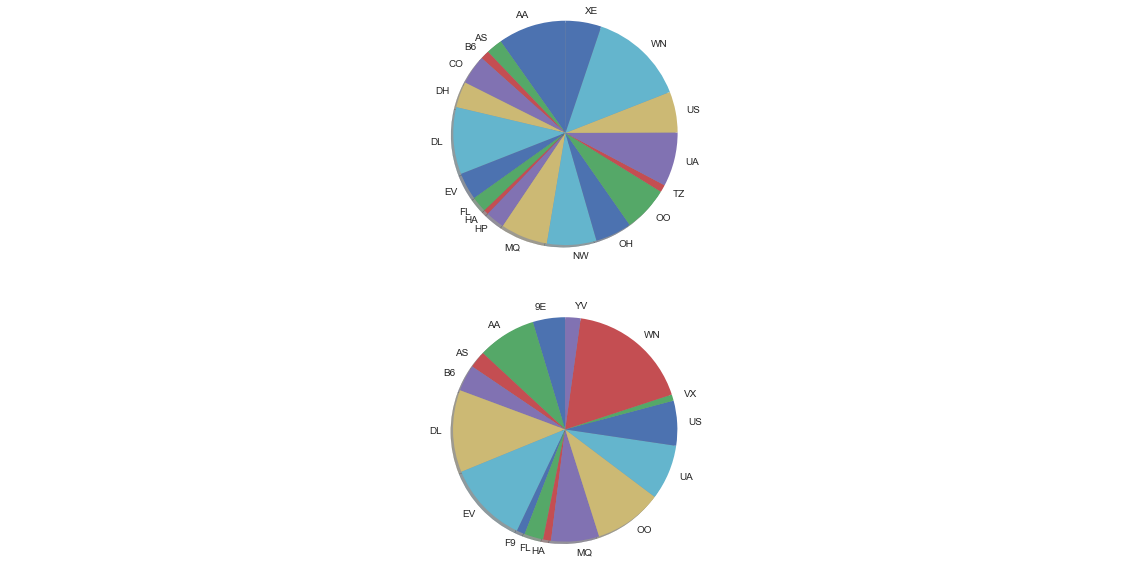

In [56]:
f, axarr = plt.subplots(2,figsize=(20,10))
colors = [cmap(i) for i in range(len(labels_04))]
colors2 = [cmap(i) for i in range(len(labels_15))]
axarr[0].pie(flights_04, labels=labels_04,
        shadow=True, startangle=90)
axarr[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[1].pie(flights_15, labels=labels_15,
        shadow=True, startangle=90)
axarr[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
import model_data_prep as mdp

In [51]:
test = mdp.year_slice(df,range(2004,2009))

In [33]:
test.columns

Index([u'route', u'Seats', u'Passengers', u'fill_pct', u'FlightTotal',
       u'CRSElapsedTime', u'ActualElapsedTime', u'ClosureIndicator',
       u'AvgDelay', u'CarrierDelay', u'WeatherDelay', u'NASDelay',
       u'CancelledAvg', u'LateAircraftAvg', u'Distance', u'FirstDate',
       u'LastDate', u'BlockTime', u'Dest', u'Seasonal'],
      dtype='object')

In [55]:
for index, time in enumerate(test['BlockTime']):
    if time < -150:
        test.drop(test.iloc[index].name, inplace=True)
name_list = []
for index in range(len(test)):
    if test.iloc[index]['FlightTotal'] < 52:
        name_list.append(test.iloc[index].name)
test.drop(name_list, inplace=True)
X = test['fill_pct']
y = test['ClosureIndicator']

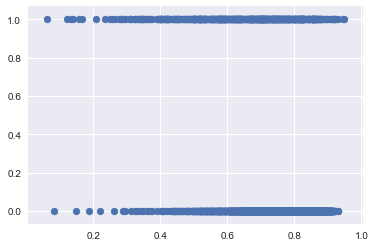

In [56]:
plt.scatter(X,y)